## Import Package

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

## Error Visible Calculation

In [5]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

## Input Data

In [6]:
train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('new_case')
test_labels = test_features.pop('new_case')

stats.describe(test_labels)

DescribeResult(nobs=170144, minmax=(-734, 4178), mean=12.02298053413579, variance=4381.956155387596, skewness=23.150131994394677, kurtosis=834.3236162937388)

## Linear Regression

In [7]:
reg = LinearRegression().fit(train_features ,train_labels)
s_linear_reg = r2_score(train_labels,reg.predict(train_features))
s_linear_reg_test = r2_score(test_labels,reg.predict(test_features))
print(s_linear_reg,s_linear_reg_test)
print(mean_squared_error(train_labels,reg.predict(train_features)),mean_squared_error(test_labels,reg.predict(test_features)))

0.6169138354205805 0.7638875503481404
1916.3791702728342 1034.6283211818004


In [8]:
stats.describe(reg.predict(test_features))

DescribeResult(nobs=170144, minmax=(-1263.5963214577762, 3477.3728692779378), mean=12.112410649844819, variance=3085.673759958532, skewness=20.098551267415026, kurtosis=631.8538369064017)

## Lasso Regression

In [9]:
reg = Lasso().fit(train_features ,train_labels)
s_Lasso_reg = r2_score(train_labels,reg.predict(train_features))
s_Lasso_reg_test = r2_score(test_labels,reg.predict(test_features))
print(s_Lasso_reg,s_Lasso_reg_test)
print(mean_squared_error(train_labels,reg.predict(train_features)),mean_squared_error(test_labels,reg.predict(test_features)))

0.6160411738672797 0.7631569890197889
1920.7446383530498 1037.8295900762917


## Decision_tree_regression

In [10]:
reg = DecisionTreeRegressor(max_depth=25)
reg.fit(train_features ,train_labels)
s_DT_reg = r2_score(train_labels,reg.predict(train_features))
s_DT_reg_test = r2_score(test_labels,reg.predict(test_features))
print(s_DT_reg,s_DT_reg_test)

0.9959713432396973 0.5718700173980884


Seems Decision Tree Regression much better 
## Decision Tree Regression depth study

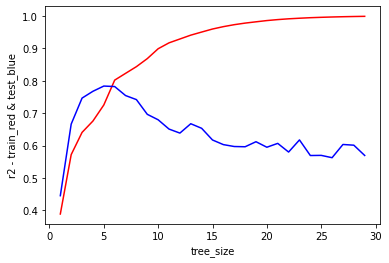

In [11]:
tree_size = []
train_pred_score =[]
test_pred_score =[]
for i in range(1,30):
    tree_size.append(i)
    reg = DecisionTreeRegressor(max_depth=i)
    reg.fit(train_features ,train_labels)
    s_DT_reg = r2_score(train_labels,reg.predict(train_features))
    s_DT_reg_test = r2_score(test_labels,reg.predict(test_features))
    train_pred_score.append(s_DT_reg)
    test_pred_score.append(s_DT_reg_test)
plt.plot(tree_size, train_pred_score,'r')
plt.plot(tree_size, test_pred_score,'b')
plt.xlabel('tree_size')
plt.ylabel('r2 - train_red & test_blue')
plt.show()

when tree_size too large, there will be overfit, so max_depth = 6 is good 

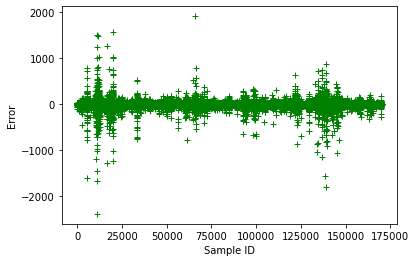

DescribeResult(nobs=170144, minmax=(0.035427807486627216, 2387.5263157894738), mean=6.8863923051366145, variance=906.2438408515955, skewness=24.06783822128234, kurtosis=998.4457537305493)

In [18]:
reg = DecisionTreeRegressor(max_depth=6)
reg.fit(train_features ,train_labels)
test_predict = reg.predict(test_features)
#test_labels = test_labels.to_numpy()

error,abserror = errorCalculate(test_labels,test_predict)
plt.plot(error,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(abserror)

In [19]:
r2_score(test_labels,reg.predict(test_features))

0.7823651162323597

In [20]:
mean_squared_error(test_labels,reg.predict(test_features))

953.6609134974362

# save_models

In [21]:
filename = 'covid_DecisionTreeRegression.sav'
joblib.dump(reg, filename)
 

['covid_DecisionTreeRegression.sav']